# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import plotly.express as px
import plotly.figure_factory as ff

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
# Carregando a base de dados

X_train = pd.read_csv('X_train_balanced.csv', delimiter=',')
X_test = pd.read_csv('X_test.csv', delimiter=',')
y_train = pd.read_csv('y_train_balanced.csv', delimiter=',').squeeze('columns')
y_test = pd.read_csv('y_test.csv', delimiter=',').squeeze('columns')

# Verificando o número de linhas e colunas

print('X_train:', X_train.shape, '| X_test:', X_test.shape)
print('y_train:', y_train.shape, '| y_test:', y_test.shape)

# Verificando se há apenas a coluna de score em y (Só para olhar, pois o squeeze por si só ja garantiria isso).

print(y_train) 

# Verificando se y está balanceado

score_count = y_train.value_counts()

print(score_count)

X_train: (261, 10) | X_test: (41, 10)
y_train: (261,) | y_test: (41,)
0      1
1      1
2      2
3      1
4      0
      ..
256    2
257    2
258    2
259    2
260    2
Name: Credit Score Encoded, Length: 261, dtype: int64
Credit Score Encoded
1    87
2    87
0    87
Name: count, dtype: int64


# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [3]:
# Criação do modelo

naive_gnb = GaussianNB()

# Treinamento

naive_gnb.fit(X_train, y_train)

# Prerando para ver o desempenho do modelo no treinamento

y_pred_train = naive_gnb.predict(X_train)

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

Acurácia:  0.9501915708812261 | Recall:  0.9501915708812261


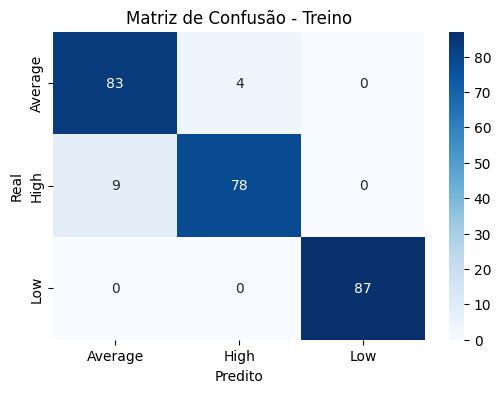

In [4]:
# Verificando a acurácia

accuracy = accuracy_score(y_train, y_pred_train) # Deu = 0.95

# Verificando o recall

recall = recall_score(y_train, y_pred_train, average='macro') # De 0.95

# Mostrando resultados

print('Acurácia: ', accuracy, '| Recall: ', recall)

# Plotando gráfico

class_names = ['Average', 'High', 'Low']

conf_matrix = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Treino')
plt.show()

# Insights:

# O modelo teve um desempenho exepcional no treino, acurácia e recall ficaram em torno de 0,95. Em multiclasse, o recall macro é a média do recall de cada classe, então esse valor alto indica que, no conjunto de treino, o modelo está reconhecendo bem as três categorias. Ainda assim, esse resultado é otimista por ser no treino; saberemos de fato se ele entendeu bem no teste, onde vamos verificar se há overfitting ou algum vazamento de informação. A matriz de confusão mostra que o modelo fez acertos consistente entre as classes, e não teve nenhuma classe com um número de erro muito expresivo.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

Acurácia:  0.8292682926829268 | Recall:  0.771062271062271


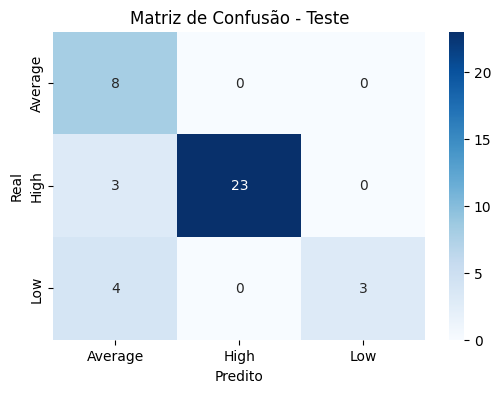

In [5]:
# Vou fazer as previsões

y_pred_test = naive_gnb.predict(X_test)

# Agora vou verificar a acurácia

accuracy_test = accuracy_score(y_test, y_pred_test) # Deu 0.82

# Verificando o recall

recall_test = recall_score(y_test, y_pred_test, average='macro') # Deu 0.77

# Mostrando resultados

print('Acurácia: ', accuracy_test, '| Recall: ', recall_test)

# Plotando o gráfico de confusão para verificar como está a distribuição

class_names = ['Average', 'High', 'Low']

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Teste')
plt.show()

# Insights:

# Como esperado o resultado do teste foi um pouco pior do que o do treino, mas não foi um valor extremamente preocupante, o modelo ainda mostrou grande capacidade em acertar cada classe, mesmo com uma base de dados relativamente pequena. Tanto a acurácia (De 0.82) e o recall (De 0.77) tiveram valores bons e relativamente altos, já com o gráfico de confusão o modelo mostrou ter uma facilidade bem maior em dizer quem se aplica a um score 'avarege' do que a quem se aplica a um score 'low' já que mesmo com uma quantidade de dados parecidas ele acertos 100% dos que eram 'avarege' mas errou quase 50% dos que eram 'low', o modelo lidou muito bem com os que eram 'high', já que mesmo tendo uma quantidade de dados bem maior em comparação com os outros, ele acertou a maioria. Em resumo, houve uma queda natural em relação ao treino, mas o modelo manteve boa capacidade de generalização e parece ter capturado relações relevantes nas variáveis.

# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

Nessa fase colocamos em prática, pela primeira vez, um modelo de classificação: o Naive Bayes, que utiliza a probabilidade para classificar e assume que as variáveis são independentes entre si. O objetivo era desenvolver um modelo capaz de classificar a coluna alvo, o Credit Score (com as classes High, Average e Low). No módulo 17 já havíamos feito todo o pré-processamento: limpeza e normalização dos dados, divisão em treino e teste e balanceamento do treino. Esses dados preparados foram salvos e serviram de base para, finalmente, criarmos o modelo.

Nesta atividade, craimos o modelo e utilizamos o GaussianNB, já que tínhamos colunas contínuas como Age e Income (embora o MultinomialNB também pudesse ter sido uma opção válida). O modelo foi treinado e, ao ser avaliado no conjunto de treino, apresentou resultados, com acurácia (De 0.95) e recall (De 0.95) impressionantes, errando pouquissimo, resultados bem otimistas... Após foi feito o teste e na etapa de teste, a que de fato valida a capacidade de generalização, os resultados caíram um pouco, como esperado, mas continuaram bons, tanto a acurácia (0.82), quanto o recall (De 0.77). A matriz de confusão mostrou que o modelo lidou melhor com as classes High e Average, enquanto teve mais dificuldade em classificar corretamente a classe Low.

Concluindo, o objetivo da atividade era criar um modelo capaz de classificar clientes em três possíveis faixas de crédito. O Naive Bayes se mostrou adequado para isso, utilizando probabilidades para prever a classe de cada cliente, e o modelo criado, apesar de seus limites, com base em seus resultados, se mostrou bem capaz para tal, entendendo bem os dados fornecidos por meio da utilização de probabilidade. Apesar disso, como o algoritmo assume independência entre as variáveis, é possível que outros modelos que não façam essa suposição consigam alcançar resultados ainda melhores.

Obs: Esse modelo foi ideal pois ele basicamente calcula a probabilidade de cada cliente estar em uma classe de crédito olhando para todas as variáveis ao mesmo tempo. Ele aprende no treino como cada variável se comporta dentro de cada classe — por exemplo, qual é a recorrência ou o padrão típico de Age e Income em clientes “High”, “Average” ou “Low”. Depois, quando entra um novo caso no teste, o modelo pega esses padrões e calcula a probabilidade de o cliente pertencer a cada uma das classes, combinando as variáveis de forma independente. No fim, escolhe a classe que tiver a maior probabilidade e dá essa como previsão.